In [47]:
import papermill as pm
import nbformat
import pandas as pd
from papermill.exceptions import PapermillExecutionError
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
import numpy as np

In [48]:
def extract_values_from_notebook(output_notebook_path):
    nb = nbformat.read(output_notebook_path, as_version=4)
    for cell in nb.cells:
        if cell.cell_type == 'code':
            for output in cell.get('outputs', []):
                if output.output_type == 'stream' and 'name' in output and output['name'] == 'stdout':
                    if "algorithm_result" in output['text']:
                        # Assuming the output is JSON-formatted string following "algorithm_result"
                        result_str = output['text'].split("algorithm_result")[1].strip()
                        result_dict = json.loads(result_str)
                        return result_dict
    return None

In [ ]:
# Define linspace for alpha and p_value_parameter
alphas = np.linspace(0.05, 0.1, 6)  
p_values= np.linspace(0.05, 0.1, 3)  


# Define node size
node_sizes = [20, 25, 30, 35, 40]

# Initialize results list
results = []

# Nested loops
for alpha in alphas:
    for p_value in p_values:
        for size in node_sizes:
            nb_path = f'/Users/takeshine/Desktop/node_number/{size}/test_intergrate.ipynb'
            output_path = f'/Users/takeshine/Desktop/node_number/{size}/output/output_prefix_{size}_alpha_{alpha}_p_{p_value}.ipynb'

            # Run the notebook simulation
            try:
                pm.execute_notebook(
                    nb_path,
                    output_path,
                    parameters={
                        'alpha': alpha,
                        'p_value_paramater': p_value
                    }
                )
                
                # Extract results
                results_dict = extract_values_from_notebook(output_path)
                
                # Append results including the parameters and sample size
                if results_dict is not None:
                    results.append({
                        'alpha': alpha,
                        'p_value_paramater': p_value,
                        'node_sizes': size,
                        **results_dict
                    })
            except PapermillExecutionError as e:
                print(f"Error executing the notebook with alpha={alpha}, p_value={p_value}, sample_size={node_sizes}: {e}")


In [54]:
results_df = pd.DataFrame(results)

In [55]:
results_df['percentage_hidden_nodes_recovered'] = results_df['percentage_hidden_nodes_recovered']*100
results_df['Normalized SHD'] = results_df['shd'] / (results_df['number_of_edges_esitimation'] + results_df['number_of_edges_true'])

In [56]:
avg_results = results_df.groupby('node_sizes')[['Normalized SHD', 'percentage_hidden_nodes_recovered','precision','recall']].mean().reset_index()
avg_results

,node_sizes,Normalized SHD,percentage_hidden_nodes_recovered,precision,recall
0,10,0.642028,52.777778,0.482275,0.291667
1,15,0.392837,155.555556,0.601860,0.615385
2,20,0.609014,112.500000,0.418873,0.369281
3,25,0.532390,68.055556,0.516025,0.431217
4,30,0.422086,112.037037,0.587506,0.569959
5,35,0.483938,78.703704,0.599768,0.456597
6,40,0.470741,189.215686,0.525561,0.535771


In [57]:
# Save DataFrame as a CSV file
csv_file_path = '/Users/takeshine/Desktop/node_number/results_df.csv'  # Define the file path
results_df.to_csv(csv_file_path, index=False)  # Save to CSV without the index

/var/folders/gl/b3dmfy1x5f72lcn0tyw55l_40000gn/T/ipykernel_2064/835877106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_results['node_sizes_str'] = avg_results['node_sizes'].apply(str)


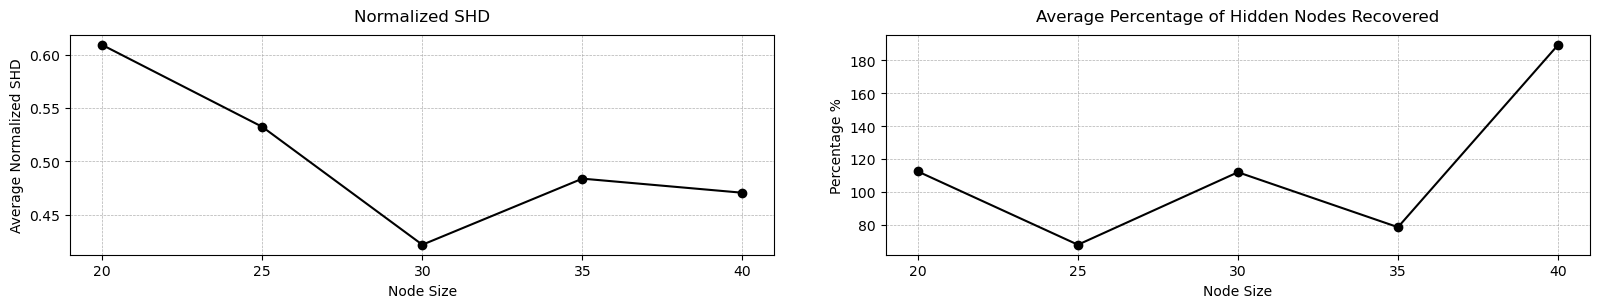

In [61]:
# Adjust figsize and subplots arrangement for horizontal layout
fig, axs = plt.subplots(1, 2, figsize=(17, 4))

# Convert sample size to string to treat as categorical data
avg_results['node_sizes_str'] = avg_results['node_sizes'].apply(str)

# Plot SHD values
axs[0].plot(avg_results['node_sizes_str'], avg_results['Normalized SHD'], color='black', marker='o', linestyle='-')
axs[0].set_title('Normalized SHD', pad=10)
axs[0].set_xlabel('Node Size')
axs[0].set_ylabel('Average Normalized SHD')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot Percentage of Hidden Nodes Recovered
axs[1].plot(avg_results['node_sizes_str'], avg_results['percentage_hidden_nodes_recovered'], color='black', marker='o', linestyle='-')
axs[1].set_title('Average Percentage of Hidden Nodes Recovered', pad=10)
axs[1].set_xlabel('Node Size')
axs[1].set_ylabel('Percentage %')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# fig.suptitle('Average Metrics by Sample Size', fontsize=18, fontweight='bold', y=0.9)

plt.tight_layout(pad=4.0)
save_path = '/Users/takeshine/Desktop/node_number/result_shd_03_25.png' # Make sure to update this path
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


/var/folders/gl/b3dmfy1x5f72lcn0tyw55l_40000gn/T/ipykernel_2064/1132900647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_results['node_sizes_str'] = avg_results['node_sizes'].apply(str)


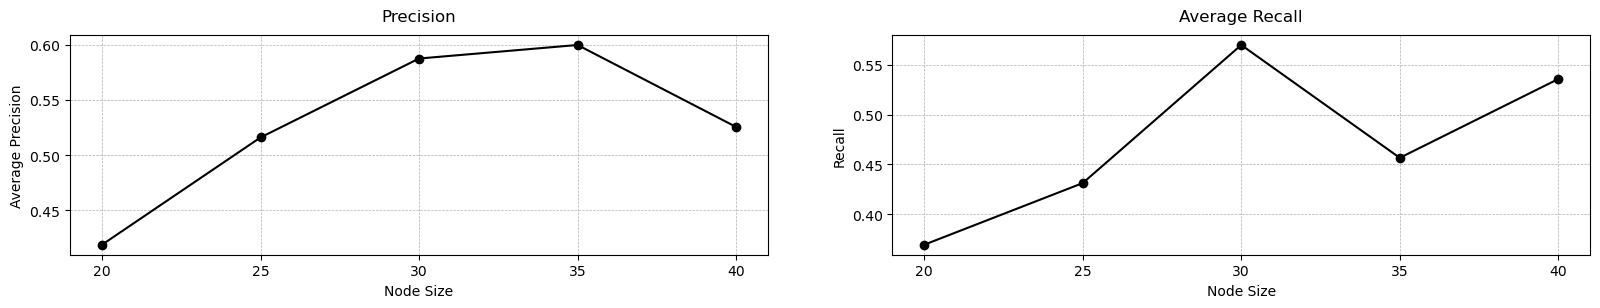

In [62]:
# Adjust figsize and subplots arrangement for horizontal layout
fig, axs = plt.subplots(1, 2, figsize=(17, 4))

# Convert sample size to string to treat as categorical data
avg_results['node_sizes_str'] = avg_results['node_sizes'].apply(str)

# Plot SHD values
axs[0].plot(avg_results['node_sizes_str'], avg_results['precision'], color='black', marker='o', linestyle='-')
axs[0].set_title('Precision', pad=10)
axs[0].set_xlabel('Node Size')
axs[0].set_ylabel('Average Precision')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot Percentage of Hidden Nodes Recovered
axs[1].plot(avg_results['node_sizes_str'], avg_results['recall'], color='black', marker='o', linestyle='-')
axs[1].set_title('Average Recall', pad=10)
axs[1].set_xlabel('Node Size')
axs[1].set_ylabel('Recall')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# fig.suptitle('Average Metrics by Sample Size', fontsize=18, fontweight='bold', y=0.9)

plt.tight_layout(pad=4.0)
save_path = '/Users/takeshine/Desktop/node_number/result_recall_03_25.png' # Make sure to update this path
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()